In [10]:
!pip install vit-keras

In [11]:
!pip install tensorflow-addons

# Step 1: Import Necessary Libraries

In [12]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from vit_keras import vit
from tensorflow.keras.applications import DenseNet121, ResNet50

# Step 2: Define Directory Paths

In [13]:
base_dir = 'IQ-OTHNCCD'
malignant_dir = 'C:/Users/SunawarKhan/JupyterNotebook/LungsCancerDetection/IQ-OTHNCCD/MalignantCases'
normal_dir = 'C:/Users/SunawarKhan/JupyterNotebook/LungsCancerDetection/IQ-OTHNCCD/NormalCases'
print(os.getcwd())

C:\Users\SunawarKhan\JupyterNotebook\LungsCancerDetection


# Step 3: Load and Preprocess Data

Number of malignant images loaded: 561
Number of normal images loaded: 416

First malignant image before resizing: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AFC6464CD0>
First normal image before resizing: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AFC66FEE90>


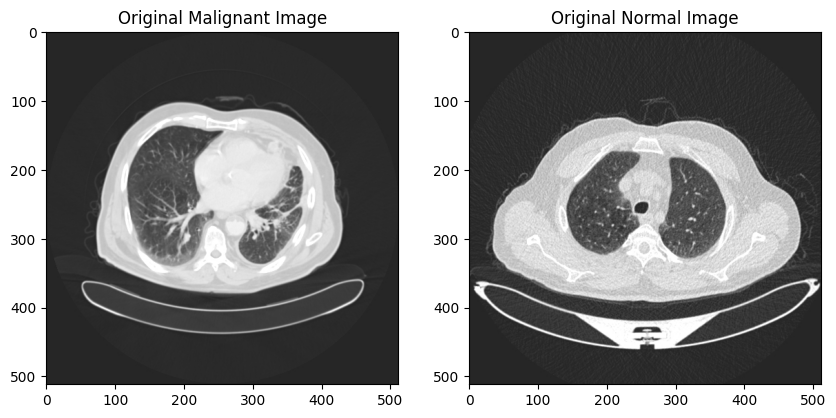


First malignant image after resizing: <PIL.Image.Image image mode=RGB size=224x224 at 0x2AFC655D150>
First normal image after resizing: <PIL.Image.Image image mode=RGB size=224x224 at 0x2AFC66A8490>


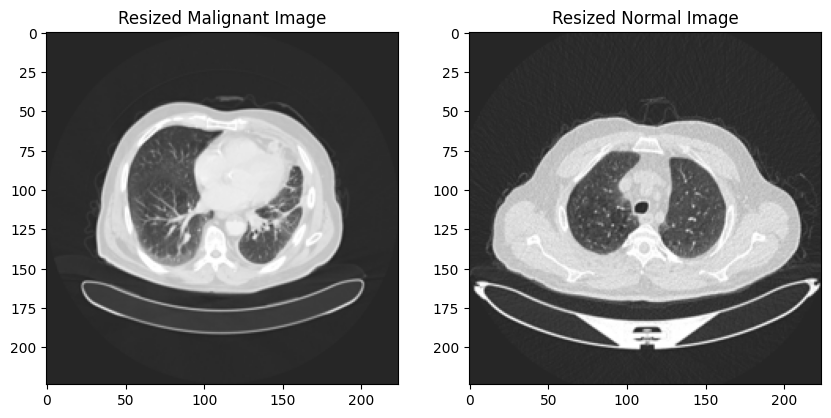


Shape of the first malignant image array: (224, 224, 3)
Shape of the first normal image array: (224, 224, 3)

Shape of X: (977, 224, 224, 3)
Shape of y: (977,)

X_train shape: (781, 224, 224, 3)
X_test shape: (196, 224, 224, 3)
y_train shape: (781,)
y_test shape: (196,)

Sample values from X_train:
[[[[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  ...

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]]


 [[[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 3

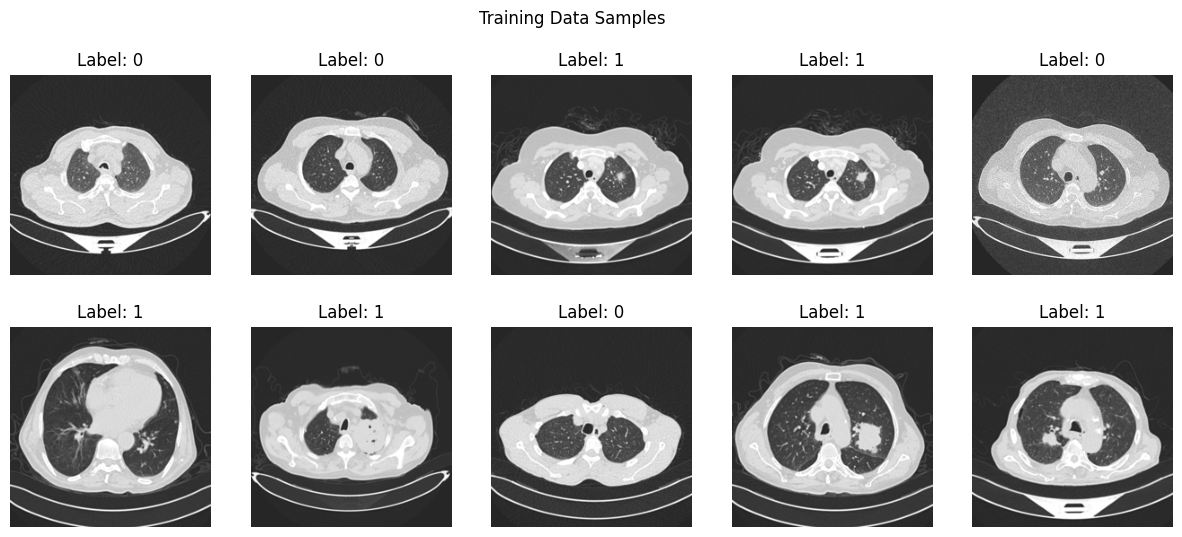

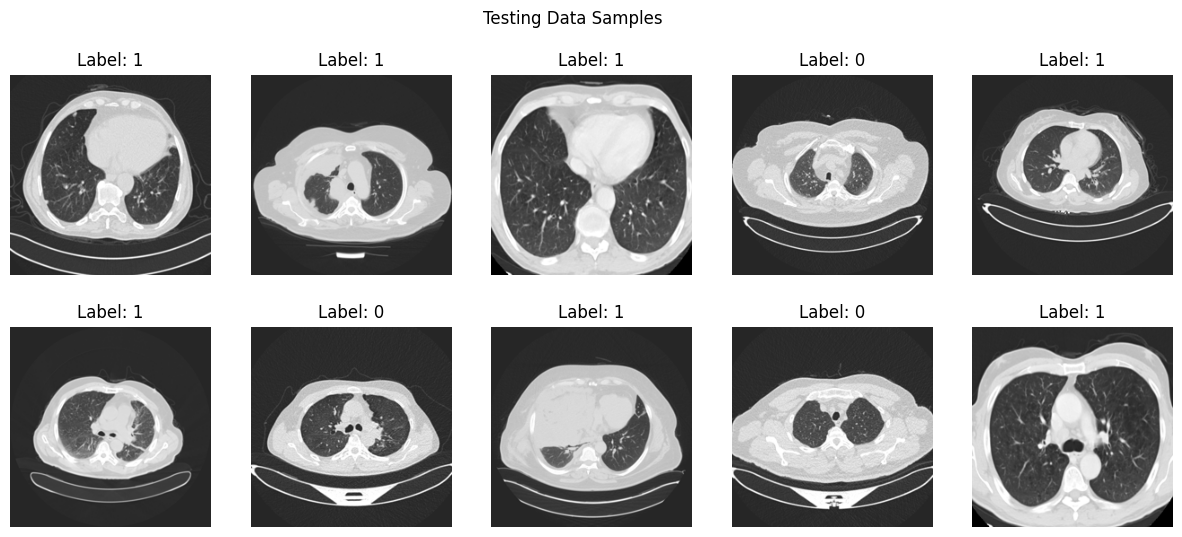

In [14]:
# Define the directories for malignant and normal cases
malignant_dir = 'C:/Users/SunawarKhan/JupyterNotebook/LungsCancerDetection/IQ-OTHNCCD/MalignantCases'
normal_dir = 'C:/Users/SunawarKhan/JupyterNotebook/LungsCancerDetection/IQ-OTHNCCD/NormalCases'

# Function to load image paths
def load_image_paths(dir_path):
    image_paths = [os.path.join(dir_path, filename) for filename in os.listdir(dir_path) if filename.endswith('.jpg')]
    return image_paths

# Function to load images
def load_images(image_paths):
    images = [Image.open(img_path) for img_path in image_paths]
    return images

# Function to resize images
def resize_images(images, size=(224, 224)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# Function to convert images to numpy arrays
def convert_images_to_arrays(images):
    image_arrays = [np.array(img) for img in images]
    return image_arrays

# Function to label images
def label_images(image_arrays, label):
    labels = [label] * len(image_arrays)
    return labels

# Load image paths
malignant_image_paths = load_image_paths(malignant_dir)
normal_image_paths = load_image_paths(normal_dir)

# Print the number of images loaded
print(f"Number of malignant images loaded: {len(malignant_image_paths)}")
print(f"Number of normal images loaded: {len(normal_image_paths)}")

# Load images
malignant_images = load_images(malignant_image_paths)
normal_images = load_images(normal_image_paths)

# Print and display the first image and its size
print("\nFirst malignant image before resizing:", malignant_images[0])
print("First normal image before resizing:", normal_images[0])

# Display original images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(malignant_images[0])
plt.title("Original Malignant Image")
plt.subplot(1, 2, 2)
plt.imshow(normal_images[0])
plt.title("Original Normal Image")
plt.show()

# Resize images
malignant_images_resized = resize_images(malignant_images)
normal_images_resized = resize_images(normal_images)

# Print and display the first resized image and its new size
print("\nFirst malignant image after resizing:", malignant_images_resized[0])
print("First normal image after resizing:", normal_images_resized[0])

# Display resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(malignant_images_resized[0])
plt.title("Resized Malignant Image")
plt.subplot(1, 2, 2)
plt.imshow(normal_images_resized[0])
plt.title("Resized Normal Image")
plt.show()

# Convert images to numpy arrays
malignant_images_arrays = convert_images_to_arrays(malignant_images_resized)
normal_images_arrays = convert_images_to_arrays(normal_images_resized)

# Print the shape of the first numpy array
print("\nShape of the first malignant image array:", malignant_images_arrays[0].shape)
print("Shape of the first normal image array:", normal_images_arrays[0].shape)

# Label images
malignant_labels = label_images(malignant_images_arrays, 1)
normal_labels = label_images(normal_images_arrays, 0)

# Combine the data
X = np.array(malignant_images_arrays + normal_images_arrays)
y = np.array(malignant_labels + normal_labels)

# Print shapes of X and y
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and testing sets
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print sample values
print("\nSample values from X_train:")
print(X_train[:2])  # Print first 2 samples

print("\nSample values from y_train:")
print(y_train[:10])  # Print first 10 labels

print("\nSample values from X_test:")
print(X_test[:2])  # Print first 2 samples

print("\nSample values from y_test:")
print(y_test[:10])  # Print first 10 labels

# Draw figures for training and testing data
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Training Data Samples')
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Testing Data Samples')
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Label: {y_test[i]}")
    ax.axis('off')
plt.show()

# Step 4: Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print a few sample values from each set
print("\nSample values from X_train:")
print(X_train[:2])  # Print first 2 samples

print("\nSample values from y_train:")
print(y_train[:10])  # Print first 10 labels

print("\nSample values from X_test:")
print(X_test[:2])  # Print first 2 samples

print("\nSample values from y_test:")
print(y_test[:10])  # Print first 10 labels

X_train shape: (781, 224, 224, 3)
X_test shape: (196, 224, 224, 3)
y_train shape: (781,)
y_test shape: (196,)

Sample values from X_train:
[[[[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  ...

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]]


 [[[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  ...

  [[38 3

# Step 5: Data Augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


# Step 6: Define Models

## Vision Transformer (ViT)

In [19]:
from vit_keras import vit

vit_model = vit.vit_b32(
    image_size=224,
    activation='sigmoid',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=1
)

vit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/10
25/25 [==============================] - 553s 17s/step - loss: 1.3104 - accuracy: 0.5045 - val_loss: 0.7281 - val_accuracy: 0.4235
Epoch 2/10
25/25 [==============================] - 447s 18s/step - loss: 0.7169 - accuracy: 0.5237 - val_loss: 0.6834 - val_accuracy: 0.5765
Epoch 3/10
25/25 [==============================] - 419s 17s/step - loss: 0.7031 - accuracy: 0.5352 - val_loss: 0.6879 - val_accuracy: 0.5765
Epoch 4/10
25/25 [==============================] - 427s 17s/step - loss: 0.6888 - accuracy: 0.5531 - val_loss: 0.6912 - val_accuracy: 0.5765
Epoch 5/10
25/25 [==============================] - 419s 17s/step - loss: 0.6861 - accuracy: 0.5647 - val_loss: 0.6975 - val_accuracy: 0.5765
Epoch 6/10
25/25 [==============================] - 419s 17s/step - loss: 0.6899 - accuracy: 0.5595 - val_loss: 0.7324 - val_accuracy: 0.5765
Epoch 7/10
25/25 [==============================] - 440s 18s/step - loss: 0.7046 - accuracy: 0.5480 - val_loss: 0.6902 - val_accuracy: 0.5765
Epoch 

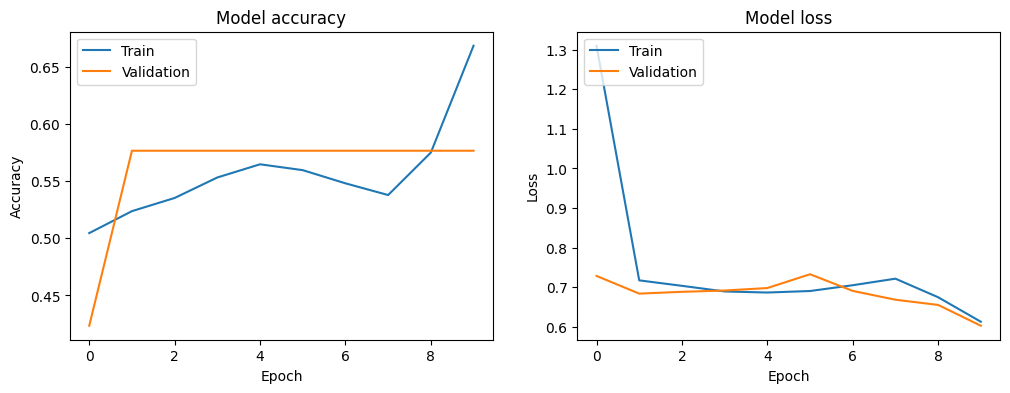

In [20]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = vit_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
test_loss, test_accuracy = vit_model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## DenseNet

In [22]:
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_densenet.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

densenet_model = Model(inputs=base_densenet.input, outputs=predictions)

for layer in base_densenet.layers:
    layer.trainable = False

densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## CheXNet

In [23]:
base_chexnet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_chexnet.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

chexnet_model = Model(inputs=base_chexnet.input, outputs=predictions)

for layer in base_chexnet.layers:
    layer.trainable = False

chexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## ResNet

In [24]:
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_resnet.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=base_resnet.input, outputs=predictions)

for layer in base_resnet.layers:
    layer.trainable = False

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Step 7: Train Models

In [25]:
def train_model(model, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'{model_name}.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=test_generator,
        callbacks=[early_stopping, model_checkpoint]
    )
    return model, history

vit_model, vit_history = train_model(vit_model, 'vit_model')
densenet_model, densenet_history = train_model(densenet_model, 'densenet_model')
chexnet_model, chexnet_history = train_model(chexnet_model, 'chexnet_model')
resnet_model, resnet_history = train_model(resnet_model, 'resnet_model')


Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.0207 - accuracy: 0.5147 

C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 558s 20s/step - loss: 1.0207 - accuracy: 0.5147 - val_loss: 0.7150 - val_accuracy: 0.5765
Epoch 2/20
25/25 [==============================] - 456s 18s/step - loss: 0.6975 - accuracy: 0.5685 - val_loss: 0.7189 - val_accuracy: 0.5765
Epoch 3/20
25/25 [==============================] - 351s 14s/step - loss: 0.7003 - accuracy: 0.5531 - val_loss: 0.6857 - val_accuracy: 0.5765
Epoch 4/20
25/25 [==============================] - 309s 12s/step - loss: 0.7035 - accuracy: 0.5352 - val_loss: 0.7359 - val_accuracy: 0.4235
Epoch 5/20
25/25 [==============================] - 314s 13s/step - loss: 0.7202 - accuracy: 0.5429 - val_loss: 0.8649 - val_accuracy: 0.5765
Epoch 6/20
25/25 [==============================] - 313s 12s/step - loss: 0.7093 - accuracy: 0.5352 - val_loss: 0.6996 - val_accuracy: 0.5765
Epoch 7/20
25/25 [==============================] - 317s 13s/step - loss: 0.7055 - accuracy: 0.5467 - val_loss: 0.6893 - val_accuracy: 0.5765
Epoch 8/20
25/25 

# Step 8: Evaluate Models

7/7 [==============================] - 27s 4s/step - loss: 0.6814 - accuracy: 0.5765
vit_model Test accuracy: 0.5765
7/7 [==============================] - 32s 3s/step
Classification Report for vit_model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.58      1.00      0.73       113

    accuracy                           0.58       196
   macro avg       0.29      0.50      0.37       196
weighted avg       0.33      0.58      0.42       196



C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

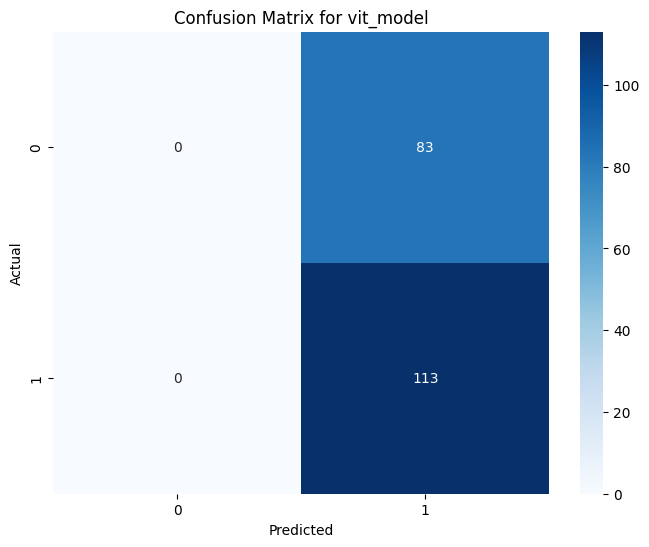

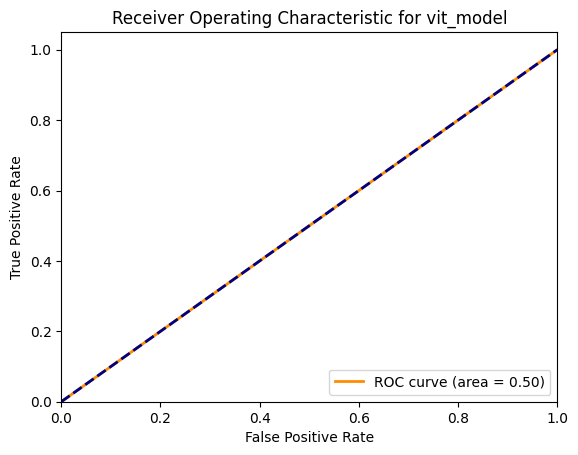

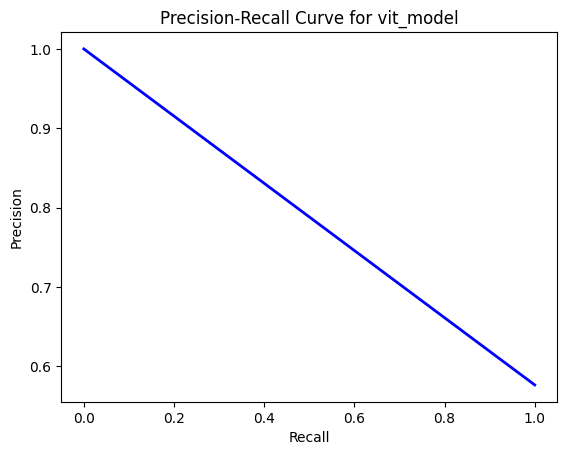

7/7 [==============================] - 17s 2s/step - loss: 0.0848 - accuracy: 0.9898
densenet_model Test accuracy: 0.9898
7/7 [==============================] - 18s 2s/step
Classification Report for densenet_model:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        83
           1       0.58      0.58      0.58       113

    accuracy                           0.52       196
   macro avg       0.51      0.51      0.51       196
weighted avg       0.52      0.52      0.52       196



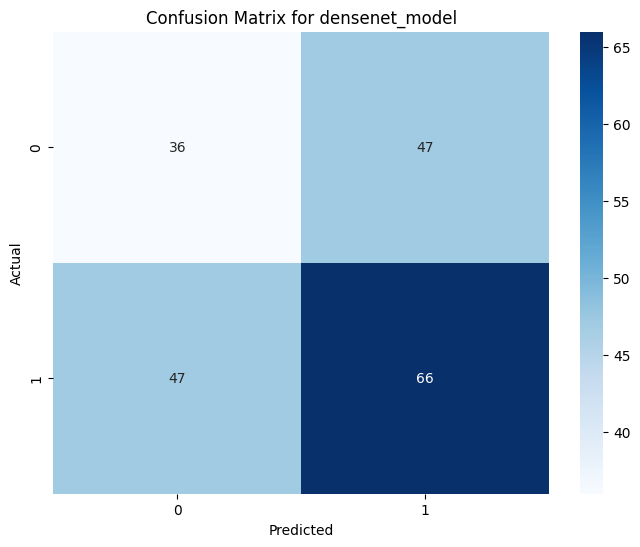

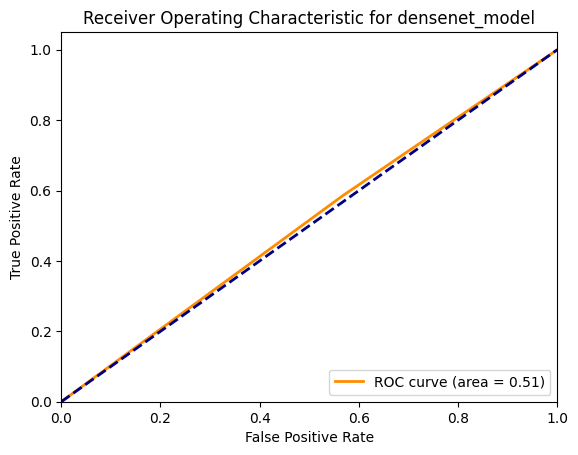

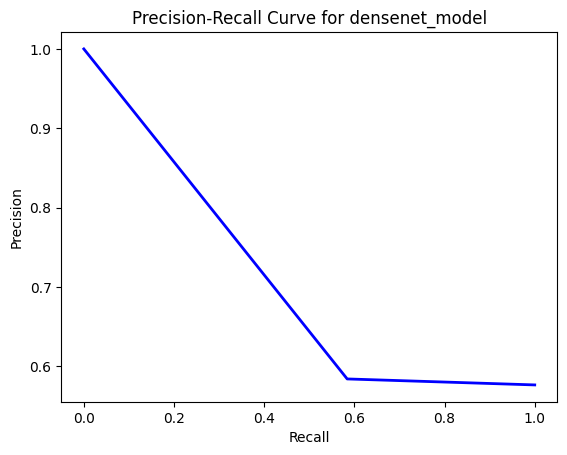

7/7 [==============================] - 16s 2s/step - loss: 0.0423 - accuracy: 0.9847
chexnet_model Test accuracy: 0.9847
7/7 [==============================] - 21s 2s/step
Classification Report for chexnet_model:
              precision    recall  f1-score   support

           0       0.48      0.47      0.47        83
           1       0.61      0.62      0.62       113

    accuracy                           0.56       196
   macro avg       0.54      0.54      0.54       196
weighted avg       0.56      0.56      0.56       196



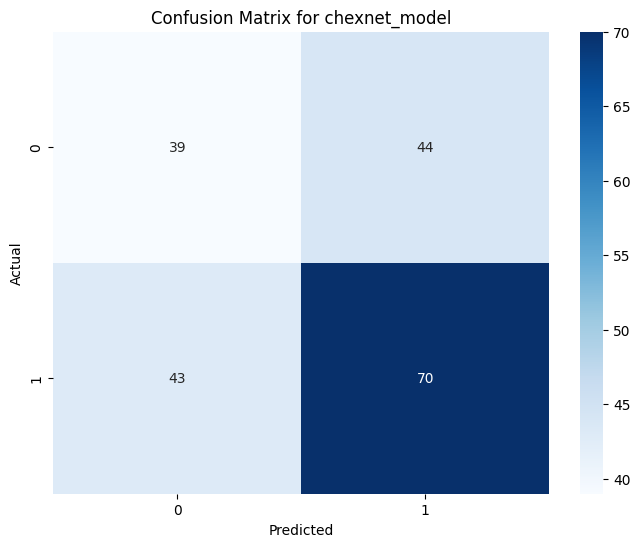

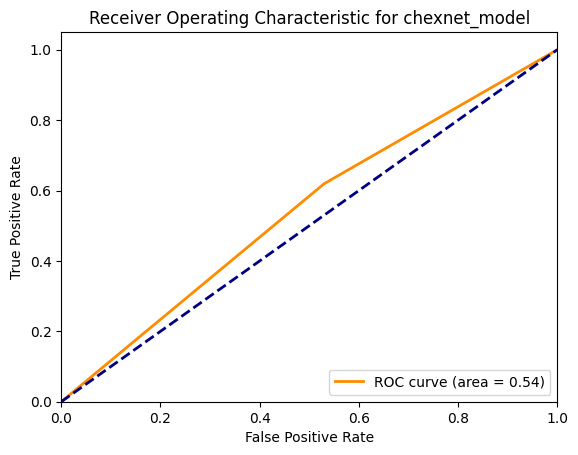

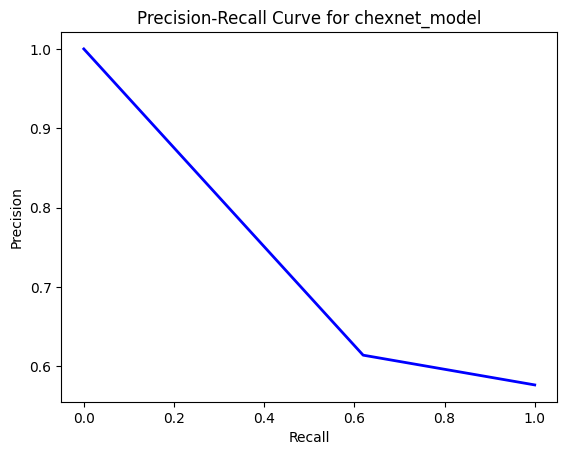

7/7 [==============================] - 28s 4s/step - loss: 0.5654 - accuracy: 0.7755
resnet_model Test accuracy: 0.7755
7/7 [==============================] - 33s 3s/step
Classification Report for resnet_model:
              precision    recall  f1-score   support

           0       0.40      0.49      0.44        83
           1       0.55      0.45      0.50       113

    accuracy                           0.47       196
   macro avg       0.47      0.47      0.47       196
weighted avg       0.48      0.47      0.47       196



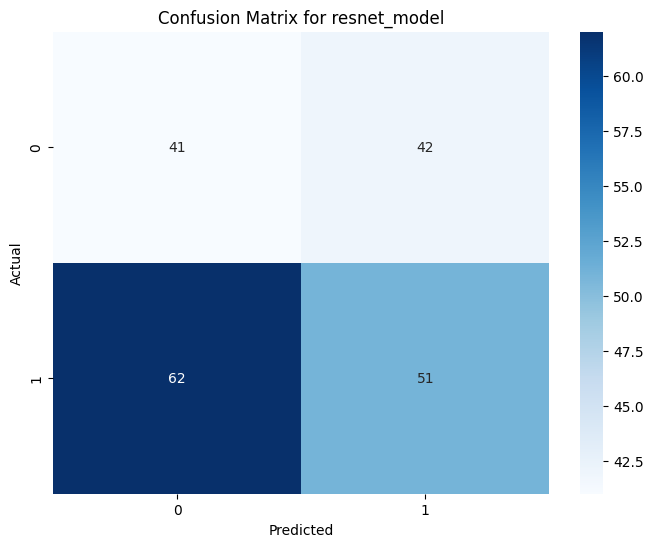

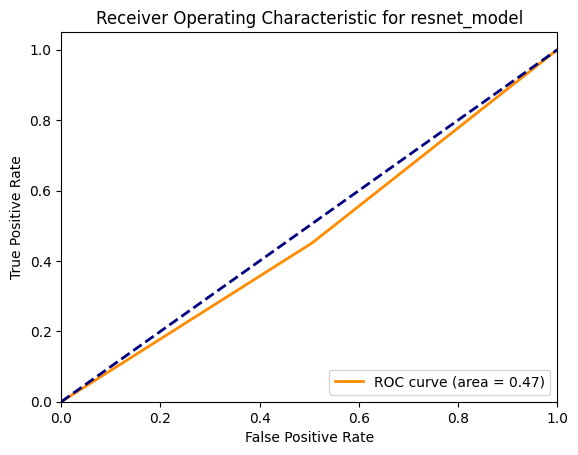

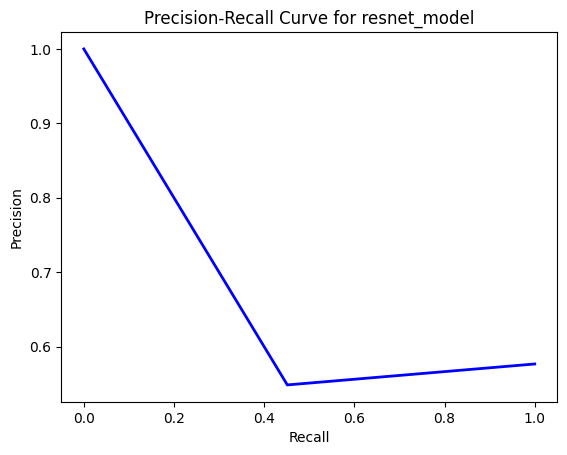

In [26]:
def evaluate_model(model, model_name):
    model.load_weights(f'{model_name}.h5')
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'{model_name} Test accuracy: {test_acc:.4f}')

    y_pred = model.predict(test_generator)
    y_pred = (y_pred > 0.5).astype(int)

    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.show()

evaluate_model(vit_model, 'vit_model')
evaluate_model(densenet_model, 'densenet_model')
evaluate_model(chexnet_model, 'chexnet_model')
evaluate_model(resnet_model, 'resnet_model')


# Step 9: Summary

In [27]:
# Assuming the models are already trained, store them in a dictionary
models_dict = {
    'vit_model': vit_model,
    'densenet_model': densenet_model,
    'chexnet_model': chexnet_model,
    'resnet_model': resnet_model
}

# Define the metrics and results DataFrame
metrics = ['accuracy', 'precision', 'recall', 'f1-score', 'auc']
results = pd.DataFrame(columns=metrics, index=models_dict.keys())

def get_model_results(model):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return report['accuracy'], report['1']['precision'], report['1']['recall'], report['1']['f1-score'], roc_auc

# Evaluate each model and store the results
for model_name, model in models_dict.items():
    accuracy, precision, recall, f1_score, auc_score = get_model_results(model)
    results.loc[model_name] = [accuracy, precision, recall, f1_score, auc_score]

print(results)


7/7 [==============================] - 26s 3s/step


C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

7/7 [==============================] - 19s 2s/step


C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

7/7 [==============================] - 19s 2s/step


C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

7/7 [==============================] - 21s 3s/step
                accuracy precision recall  f1-score  auc
vit_model       0.576531  0.576531    1.0  0.731392  0.5
densenet_model  0.576531  0.576531    1.0  0.731392  0.5
chexnet_model   0.576531  0.576531    1.0  0.731392  0.5
resnet_model    0.576531  0.576531    1.0  0.731392  0.5


C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SunawarKhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa